# [CM5] Gradient Tree Boosting

Importing all necessary libraries.

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [53]:
df_train = pd.read_csv('cleaned_normalized_coviddata.csv')

In [54]:
df_train.head()

,Day,State ID,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio,Confirmed,Deaths,Recovered
0,2,1,-1.178243,0.304476,-0.200641,0.143976,-0.483393,-0.475230,-1.301745,-0.128579,-0.217013,0.118745,-1.168255,True,False,False
1,2,2,3.607611,-3.031933,-0.448967,-0.290209,-0.569371,-1.797949,2.071154,-0.754174,-0.276752,1.614369,3.491260,True,True,False
2,2,3,-0.945708,-0.944926,0.389043,0.088511,-0.007491,0.075713,-1.268952,0.181561,-0.239163,0.508908,0.384916,True,True,True
3,2,4,-0.741458,0.025816,-0.482359,0.202178,-0.456457,-0.029941,-0.559153,-0.422031,-0.242214,0.573935,-0.546987,True,True,True
4,2,5,-0.552594,-1.365168,4.275448,-0.502417,4.022089,-0.791062,-0.177543,4.903416,-0.122735,-0.921689,0.384916,True,True,False


In [55]:
df_covid = df_train.iloc[:,:-3]
#Target 1 is Recovered
df_target1 = df_train.iloc[:,-1:]
#Target 2 is Deaths
df_target2 = df_train.iloc[:,-2:-1]
#Target 3 is Confirmed
df_target3 = df_train.iloc[:,-3:-2]

# Part1: Gradient Boosting results using original features 

## 1. Gradient Boosting implementation on Target 1: Recovered

### number of estimators: {5, 10, 50, 150, 200} for target 1: Recovered

In [56]:
n_estimators_list1 = [5,10,50,150,200]

In [57]:
#Gradient Boosting: Checking for best value for no of estimators for target 1: Recovered
accuracies_recovered = []
for n_estimators in n_estimators_list1:
    classifier_GradientBoosting = GradientBoostingClassifier(n_estimators = n_estimators)
    scores = cross_val_score(classifier_GradientBoosting, df_covid, np.ravel(df_target1), cv=10)
    accuracies_recovered.append(scores.mean())
accuracies_recovered

[0.8282608695652174,
 0.8695652173913043,
 0.9391304347826088,
 0.9384057971014492,
 0.9376811594202898]

Text(0, 0.5, 'Mean Accuracy for Target 1:Recovered')

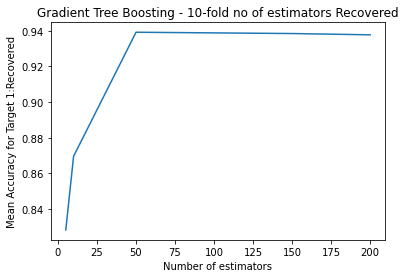

In [58]:
#Plotting the mean accuracy versus the number of estimators for Recovered
plt.title("Gradient Tree Boosting - 10-fold no of estimators Recovered")
plt.plot(n_estimators_list1, accuracies_recovered)
plt.xlabel('Number of estimators')
plt.ylabel('Mean Accuracy for Target 1:Recovered')

#### The accuracy almost remains constant after number of estimators = 50. Thus any value above this could result in overfitting. The best value of estimator is calculated by iterating over 5-50

### Taking number of estimators: np.arange(5,50) for target 1: Recovered

In [59]:
#Gradient Boosting: Further checking for best value for no of estimators for target 1: Recovered from n _estimators 5 to 50
n_estimators_list1 = np.arange(5,50)
accuracies_recovered = []
for n_estimators in n_estimators_list1:
    classifier_GradientBoosting = GradientBoostingClassifier(n_estimators = n_estimators)
    scores = cross_val_score(classifier_GradientBoosting, df_covid, np.ravel(df_target1), cv=10)
    accuracies_recovered.append(scores.mean())


In [60]:
# checking max accuracy for recovered and its estimator value
temp = np.where(accuracies_recovered == np.amax(accuracies_recovered))
print("The maximum value of accuracy is:",accuracies_recovered[temp[0][0]]*100)
print("The maximum value occurs when estimator value = ",temp[0][0])


The maximum value of accuracy is: 94.05797101449276
The maximum value occurs when estimator value =  29


### Performance peaks at n_estimators = 29 and hence we will choose that for the number of trees hyperparameter value for target 1: Recovered.

In [61]:
#Gradient Boosting: Checking for best value for max depth for target 1: Recovered ,by keeping n_estimates = 29
max_depth_list = [3,5,10,None]
accuracies_maxdepth1 = []
for max_depth in max_depth_list:
    classifier_GradientBoosting = GradientBoostingClassifier(n_estimators = 29, max_depth = max_depth)
    scores = cross_val_score(classifier_GradientBoosting, df_covid, np.ravel(df_target1), cv=10)
    accuracies_maxdepth1.append(scores.mean())
accuracies_maxdepth1

[0.9398550724637682,
 0.9391304347826088,
 0.9152173913043479,
 0.9166666666666666]

Text(0, 0.5, 'Mean Accuracy for Target 1:Recovered')

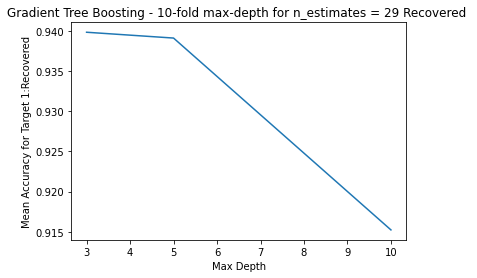

In [62]:
#Plotting the mean accuracy versus the max depth for n_estimates = 29 for Recovered
plt.title("Gradient Tree Boosting - 10-fold max-depth for n_estimates = 29 Recovered ")
plt.plot(max_depth_list, accuracies_maxdepth1)
plt.xlabel('Max Depth')
plt.ylabel('Mean Accuracy for Target 1:Recovered')

### Accuracy is best for Max Depth 3 when we kept the n_estimators as 29 for target 1: Recovered.

## 2. Gradient Boosting implementation on Target 2: Deaths

### Taking number of estimators: [5, 10, 50, 150, 200] for target 2: Deaths

In [63]:
#Gradient Boosting: Checking for best value for no of estimators for target 2: Deaths
n_estimators_list2 = [5,10,50,150,200]
accuracies_deaths = []
for n_estimators in n_estimators_list2:
    classifier_GradientBoosting = GradientBoostingClassifier(n_estimators = n_estimators)
    scores = cross_val_score(classifier_GradientBoosting, df_covid, np.ravel(df_target2), cv=10)
    accuracies_deaths.append(scores.mean())
accuracies_deaths

[0.832608695652174,
 0.8413043478260869,
 0.8362318840579709,
 0.826086956521739,
 0.8217391304347826]

Text(0, 0.5, 'Mean Accuracy for Target 1:Deaths')

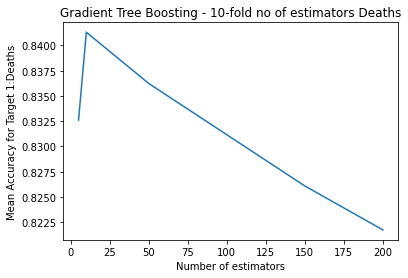

In [64]:
#Plotting the mean accuracy versus the number of estimators for Deaths
plt.title("Gradient Tree Boosting - 10-fold no of estimators Deaths")
plt.plot(n_estimators_list2, accuracies_deaths)
plt.xlabel('Number of estimators')
plt.ylabel('Mean Accuracy for Target 1:Deaths')

#### Here we can see in the above graph that performance peaks between 5 to 25 no of estimators so we will further check on which particular value it peaks. 

### Taking number of estimators: np.arange(5,25) for target 2: Deaths

In [65]:
#Gradient Boosting: Further checking for best value for no of estimators for target 2: Deaths from n _estimators 5 to 50
n_estimators_list1 = np.arange(5,25)
accuracies_deaths = []
for n_estimators in n_estimators_list1:
    classifier_GradientBoosting = GradientBoostingClassifier(n_estimators = n_estimators)
    scores = cross_val_score(classifier_GradientBoosting, df_covid, np.ravel(df_target2), cv=10)
    accuracies_deaths.append(scores.mean())


In [66]:
# checking max accuracy for deaths and its estimator value
temp = temp = np.where(accuracies_deaths == np.amax(accuracies_deaths))
print("The maximum value of accuracy is:",accuracies_deaths[temp[0][0]]*100)
print("The maximum value occurs when estimator value = ",4+temp[0][0])

The maximum value of accuracy is: 84.42028985507247
The maximum value occurs when estimator value =  8


### Performance peaks at n_estimators 8  and hence we will choose that for the number of trees hyperparameter value for target 2: Deaths.

In [67]:
#Checking for best value for max depth for target 2: Deaths by keeping n_estimates = 8
max_depth_list = [3,5,10,None]
accuracies_maxdepth2 = []
for max_depth in max_depth_list:
    classifier_GradientBoosting = GradientBoostingClassifier(n_estimators = 8, max_depth = max_depth)
    scores = cross_val_score(classifier_GradientBoosting, df_covid, np.ravel(df_target2), cv=10)
    accuracies_maxdepth2.append(scores.mean())
accuracies_maxdepth2

[0.8427536231884056,
 0.8347826086956521,
 0.8239130434782608,
 0.8166666666666667]

Text(0, 0.5, 'Mean Accuracy for Target 2: Deaths')

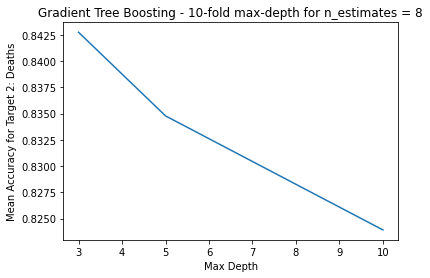

In [68]:
#Plotting the mean accuracy versus the max depth for n_estimates = 8 for Deaths
plt.title("Gradient Tree Boosting - 10-fold max-depth for n_estimates = 8")
plt.plot(max_depth_list, accuracies_maxdepth2)
plt.xlabel('Max Depth')
plt.ylabel('Mean Accuracy for Target 2: Deaths')

### Accuracy is best for Max Depth 3 when we kept the n_estimators as 8 for target 2: Deaths.

## 3. Gradient Boosting implementation on Target 3: Confirmed

### Taking number of estimators: [5, 10, 50, 150, 200] for target 3: Confirmed

In [69]:
#Checking for best value for no of estimators for target 3: Confirmed
n_estimators_list3 = [5,10,50,150,200]
accuracies_confirmed = []
for n_estimators in n_estimators_list3:
    classifier_GradientBoosting = GradientBoostingClassifier(n_estimators = n_estimators)
    scores = cross_val_score(classifier_GradientBoosting, df_covid, np.ravel(df_target3), cv=10)
    accuracies_confirmed.append(scores.mean())
accuracies_confirmed

[0.8623188405797102,
 0.8608695652173912,
 0.8478260869565218,
 0.8369565217391305,
 0.8260869565217392]

Text(0, 0.5, 'Mean Accuracy for Target 3:Confirmed')

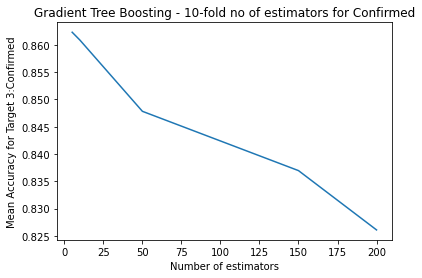

In [70]:
#Plotting the mean accuracy versus the number of estimators for Confirmed
plt.title("Gradient Tree Boosting - 10-fold no of estimators for Confirmed")
plt.plot(n_estimators_list3, accuracies_confirmed)
plt.xlabel('Number of estimators')
plt.ylabel('Mean Accuracy for Target 3:Confirmed')

### Performance peaks at 5 number of estimators and hence we will choose that for the number of trees hyperparameter value for target 3: Confirmed.

In [71]:
#Checking for best value for max depth for target 3: Confirmed by keeping n_estimates = 5
max_depth_list = [3,5,10,None]
accuracies_maxdepth3 = []
for max_depth in max_depth_list:
    classifier_GradientBoosting = GradientBoostingClassifier(n_estimators = 5, max_depth = max_depth)
    scores = cross_val_score(classifier_GradientBoosting, df_covid, np.ravel(df_target3), cv=10)
    accuracies_maxdepth3.append(scores.mean())
accuracies_maxdepth3

[0.8623188405797102,
 0.7992753623188407,
 0.7811594202898551,
 0.7797101449275363]

Text(0, 0.5, 'Mean Accuracy for Target 3: Confirmed')

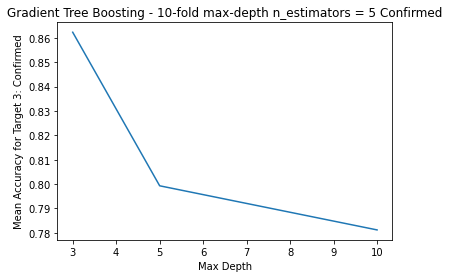

In [72]:
#Plotting the mean accuracy versus the max depth for n_estimators = 5 for Confirmed
plt.title("Gradient Tree Boosting - 10-fold max-depth n_estimators = 5 Confirmed")
plt.plot(max_depth_list, accuracies_maxdepth3)
plt.xlabel('Max Depth')
plt.ylabel('Mean Accuracy for Target 3: Confirmed')

### Accuracy is best for Max Depth 3 when we kept the n_estimators as 5 for target 3: Confirmed.

# Part 2: Gradient Boosting results using PCA features 

In [73]:
#extracting pca features from CM2
%store -r pca_features

In [74]:
pca_features.shape

(1380, 11)

## 1. Gradient Boosting implementation on Target 1:Recovered using PCA

In [75]:
#Checking for best value for no of estimators for target 1: Recovered using PCA
accuracies_recovered_pca = []
n_estimators_list1 = [5,10,50,150,200]
for n_estimators in n_estimators_list1:
    classifier_GradientBoosting = GradientBoostingClassifier(n_estimators = n_estimators)
    scores = cross_val_score(classifier_GradientBoosting,pca_features[:,:3], np.ravel(df_target1), cv=10)
    accuracies_recovered_pca.append(scores.mean())
accuracies_recovered_pca

[0.7550724637681159,
 0.7789855072463767,
 0.9340579710144927,
 0.9260869565217391,
 0.9239130434782608]

Text(0, 0.5, 'Mean Accuracy for Target 1:Recovered')

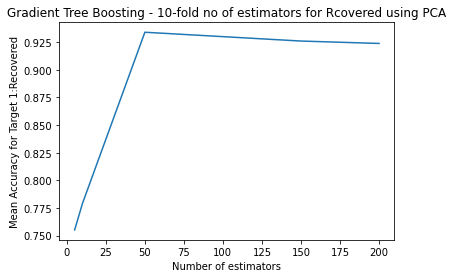

In [76]:
#Plotting the mean accuracy versus the number of estimators for Recovered using PCA
plt.title("Gradient Tree Boosting - 10-fold no of estimators for Rcovered using PCA")
plt.plot(n_estimators_list1, accuracies_recovered_pca)
plt.xlabel('Number of estimators')
plt.ylabel('Mean Accuracy for Target 1:Recovered')

### The Maximum accuracy occurs when n_estimators = 50 and hence we will choose that for the number of trees hyperparameter value for target 1: Recovered.

In [77]:
#Checking for best value for max depth for target 1: Recovered ,by keeping n_estimates = 50 using PCA
max_depth_list = [3,5,10,None]
accuracies_maxdepth1_pca = []
for max_depth in max_depth_list:
    classifier_GradientBoosting = GradientBoostingClassifier(n_estimators = 50, max_depth = max_depth)
    scores = cross_val_score(classifier_GradientBoosting, pca_features[:,:3], np.ravel(df_target1), cv=10)
    accuracies_maxdepth1_pca.append(scores.mean())
accuracies_maxdepth1_pca

[0.9333333333333333, 0.9195652173913043, 0.905072463768116, 0.8971014492753623]

Text(0, 0.5, 'Mean Accuracy for Target 1:Recovered')

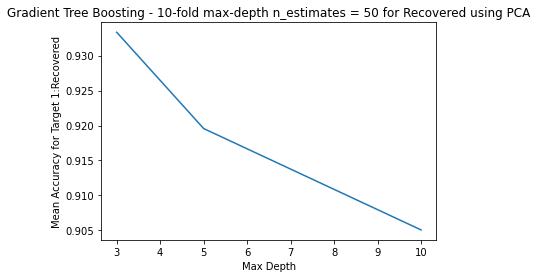

In [78]:
#Plotting the mean accuracy versus the max depth for n_estimates = 50 for Recovered using PCA
plt.title("Gradient Tree Boosting - 10-fold max-depth n_estimates = 50 for Recovered using PCA")
plt.plot(max_depth_list, accuracies_maxdepth1_pca)
plt.xlabel('Max Depth')
plt.ylabel('Mean Accuracy for Target 1:Recovered')

### Accuracy is best for Max Depth 3 when we kept the n_estimators as 50 for target 1: Recovered.

## 2. Gradient Boosting implementation on Target 2: Deaths using PCA

In [79]:
#Checking for best value for no of estimators for target 2: Deaths using PCA
n_estimators_list2 = [5,10,50,150,200]
accuracies_deaths_pca = []
for n_estimators in n_estimators_list2:
    classifier_GradientBoosting = GradientBoostingClassifier(n_estimators = n_estimators)
    scores = cross_val_score(classifier_GradientBoosting,pca_features[:,:3], np.ravel(df_target2), cv=10)
    accuracies_deaths_pca.append(scores.mean())
accuracies_deaths_pca

[0.9014492753623189,
 0.9101449275362319,
 0.9086956521739131,
 0.9021739130434783,
 0.9021739130434783]

Text(0, 0.5, 'Mean Accuracy for Target 1:Deaths')

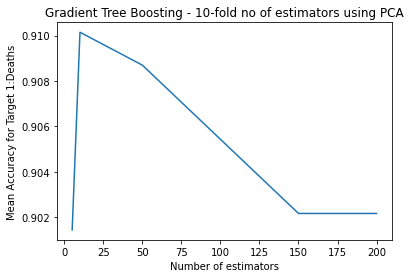

In [80]:
#Plotting the mean accuracy versus the number of estimators using PCA
plt.title("Gradient Tree Boosting - 10-fold no of estimators using PCA")
plt.plot(n_estimators_list2, accuracies_deaths_pca)
plt.xlabel('Number of estimators')
plt.ylabel('Mean Accuracy for Target 1:Deaths')

### The maximum accuracy occurs when n_estimators = 10 and hence we will choose that for the number of trees hyperparameter value for target 2: Deaths.

In [81]:
#Checking for best value for max depth for target 2: Deaths by keeping n_estimates = 10 using PCA
max_depth_list = [3,5,10,None]
accuracies_maxdepth2_pca = []
for max_depth in max_depth_list:
    classifier_GradientBoosting = GradientBoostingClassifier(n_estimators = 10, max_depth = max_depth)
    scores = cross_val_score(classifier_GradientBoosting, pca_features[:,:3], np.ravel(df_target2), cv=10)
    accuracies_maxdepth2_pca.append(scores.mean())
accuracies_maxdepth2_pca

[0.9101449275362319,
 0.9086956521739131,
 0.8992753623188404,
 0.8942028985507247]

Text(0, 0.5, 'Mean Accuracy for Target 2: Deaths')

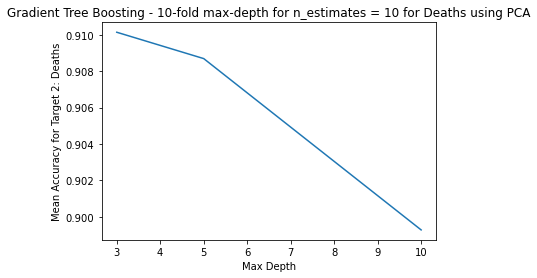

In [82]:
#Plotting the mean accuracy versus the max depth for n_estimates = 10 for Deaths using PCA
plt.title("Gradient Tree Boosting - 10-fold max-depth for n_estimates = 10 for Deaths using PCA")
plt.plot(max_depth_list, accuracies_maxdepth2_pca)
plt.xlabel('Max Depth')
plt.ylabel('Mean Accuracy for Target 2: Deaths')

### Accuracy is best for Max Depth 3 when we kept the n_estimators as 10 for target 2: Deaths.

## 3. Gradient Boosting implementation on Target 3: Confirmed using PCA

In [83]:
#Checking for best value for no of estimators for target 3: Confirmed using PCA
n_estimators_list3 = [5,10,50,150,200]
accuracies_confirmed_pca = []
for n_estimators in n_estimators_list3:
    classifier_GradientBoosting = GradientBoostingClassifier(n_estimators = n_estimators)
    scores = cross_val_score(classifier_GradientBoosting, pca_features[:,:3], np.ravel(df_target3), cv=10)
    accuracies_confirmed_pca.append(scores.mean())
accuracies_confirmed_pca

[0.963768115942029,
 0.9644927536231884,
 0.9630434782608696,
 0.9608695652173912,
 0.9579710144927536]

Text(0, 0.5, 'Mean Accuracy for Target 3:Confirmed')

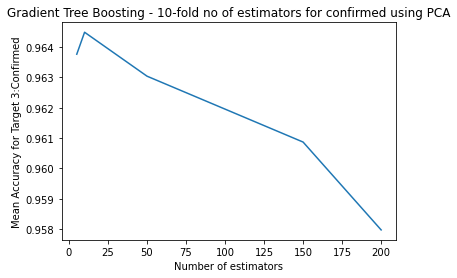

In [84]:
#Plotting the mean accuracy versus the number of estimators for Confirmed using PCA
plt.title("Gradient Tree Boosting - 10-fold no of estimators for confirmed using PCA")
plt.plot(n_estimators_list3, accuracies_confirmed_pca)
plt.xlabel('Number of estimators')
plt.ylabel('Mean Accuracy for Target 3:Confirmed')

### The maximum accuracy occurs when n_estimators = 10 and hence we will choose that for the number of trees hyperparameter value for target 3: Confirmed.

In [85]:
#Checking for best value for max depth for target 3: confirmed by keeping n_estimates = 10 using PCA
max_depth_list = [3,5,10,None]
accuracies_maxdepth3_pca = []
for max_depth in max_depth_list:
    classifier_GradientBoosting = GradientBoostingClassifier(n_estimators = 10, max_depth = max_depth)
    scores = cross_val_score(classifier_GradientBoosting, pca_features[:,:3], np.ravel(df_target3), cv=10)
    accuracies_maxdepth3_pca.append(scores.mean())
accuracies_maxdepth3_pca

[0.963768115942029, 0.9652173913043478, 0.960144927536232, 0.960144927536232]

Text(0, 0.5, 'Mean Accuracy for Target 3: Confirmed')

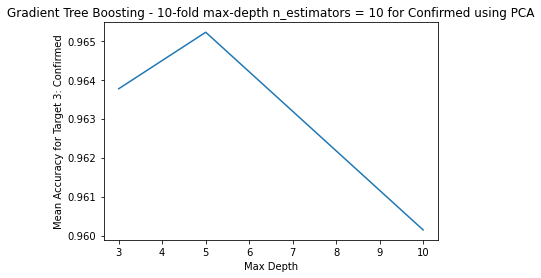

In [87]:
#Plotting the mean accuracy versus the max depth for n_estimators = 10 for confirmed using PCA
plt.title("Gradient Tree Boosting - 10-fold max-depth n_estimators = 10 for Confirmed using PCA")
plt.plot(max_depth_list, accuracies_maxdepth3_pca)
plt.xlabel('Max Depth')
plt.ylabel('Mean Accuracy for Target 3: Confirmed')

### The maximum accuracy occurs when n_estimators = 5 nd max_depth = 5 for target 3: Confirmed